# Simple NMP


In [1]:
# import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.integrate import odeint

# Plotting
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
%matplotlib inline

# Control system library
import control

In [2]:
np.version.version

'1.19.2'

## Transfer function

Simple transfer function
$$
\frac{-s+2}{s^2+3s+1}
$$


   -s + 2
-------------
s^2 + 3 s + 1



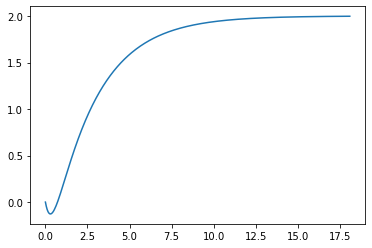

In [3]:
# numerator
num = np.array([-1, 2])
den = np.array([1, 3, 1])

# transfer function
H = control.tf(num, den)
print(H)

# step response:
t, y = control.step_response(H)
plt.plot(t, y)

Poles: [-2.61803399 -0.38196601]
Zeros: [2.]


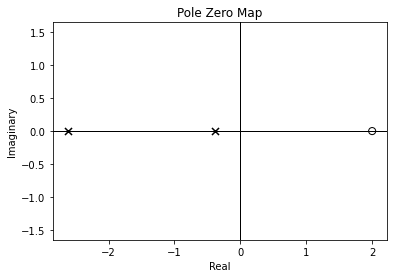

In [4]:
# Generating the pole zero map
control.pzmap(H)

# Poles:
p = control.pole(H)
z = control.zero(H)

print(f"Poles: {p}")
print(f"Zeros: {z}")

In [21]:
# Feedback control
feedback = control.feedback(H, 1)
feedback

TransferFunction(array([-1,  2]), array([1, 2, 3]))

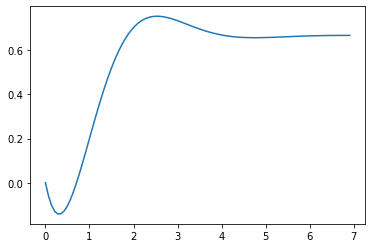

In [43]:
t, y = control.step_response(feedback)
plt.plot(t, y)

In [23]:
# Create state space for this feedback system
plant = control.tf2ss(feedback)
print(plant)

A = [[-2. -3.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-1.  2.]]

D = [[0.]]



In [48]:
# Check the forced response for the system\
# Time:
dt = 0.05
tn = 25
t0 = 0
t = np.arange(0, 25, 0.05)

x_init = np.array([0, 1])
sp = np.ones(int(tn/dt))
t, y, x = control.forced_response(plant, t, sp, x_init, return_x=True)




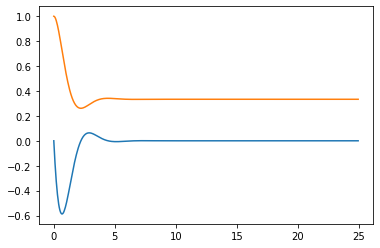

In [49]:
# Plot the states
plt.plot(t, x[0])
plt.plot(t, x[1])

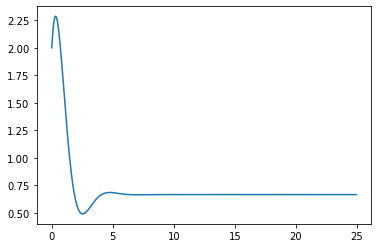

In [50]:
plt.plot(t, y)

In [24]:
t = np.arange(0, 25, 0.05)
t.shape

(500,)

In [27]:
forced_response = 2*np.ones(int(25/0.05))
forced_response.shape

(500,)

In [6]:
# Check the state space
st_space = control.tf2ss(H)
print(st_space)

A = [[-3. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-1.  2.]]

D = [[0.]]




 -2 s + 0.5
-------------
s^2 + 5 s + 1

[ 0.         -0.05349158 -0.09937389 ...  0.49902918  0.499035
  0.49904079]


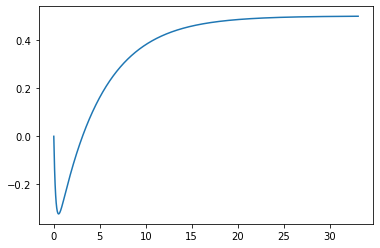

In [7]:
# numerator
num = np.array([-2, 0.5])
den = np.array([1, 5, 1])

# transfer function
H2 = control.tf(num, den)
print(H2)

# step response:
t, y = control.step_response(H2)
plt.plot(t, y)

print(y)


Zeros: [0.25]


array([0.25])

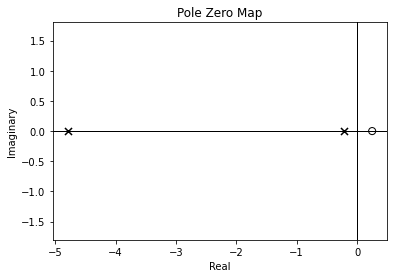

In [8]:
# Pole zero plot
control.pzmap(H2)
print(f"Zeros: {control.zero(H2)}")
control.zero(H2)

## Coding the above as a process

In [9]:
state_space = control.tf2ss(H2)
print(state_space)

io_space = control.tf2io(H2)
print(io_space)

A = [[-5. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-2.   0.5]]

D = [[0.]]

System: sys[1]
Inputs (1): u[0], 
Outputs (1): y[0], 
States (2): x[0], x[1], 


In [10]:
type(io_space)

control.iosys.LinearIOSystem

In [11]:
# Convert into differential eqns:
def differential(x, t, A, B, u):
    dxdt = A@x + B*u
    return dxdt


# Initial conditions
x_init_1 = np.array([1, 1])
x_init_2 = np.array([-1, -1])
x_init_3 = np.array([0, 0])
x_init_4 = np.array([0, 1])


# Define a function:
def solve(x_init):

    # Define the parameters
    # State space parameters
    A = np.array([[-5, -1], [1, 0]])
    # A@x_init
    B = np.array([1, 0])
    u = np.array([2])
    C = np.array([-2, 0.25])
    D = np.array([0])

    # Set time step
    t = np.arange(0, 25, 0.05)

    # Solve the process:
    x = odeint(differential, x_init, t, args=(A, B, u,))

    # Get the output
    y = C@x.T + D*u

    return x, y, t



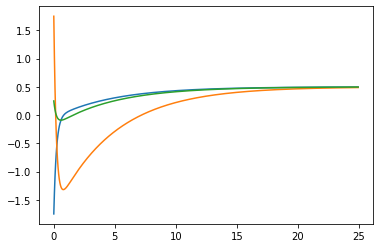

In [12]:
x1, y1, t1 = solve(x_init_1)
x2, y2, t2 = solve(x_init_2)
x3, y3, t3 = solve(x_init_3)
x4, y4, t4 = solve(x_init_4)

# Plot the graph
plt.plot(t1, y1)
plt.plot(t2, y2)
#plt.plot(t3, y3)
plt.plot(t4, y4)


In [13]:
x1.shape
t1.shape

(500,)

array([-2.75000000e+00, -2.20454417e+00, -1.77376157e+00, -1.43323918e+00,
       -1.16376469e+00, -9.50218234e-01, -7.80700893e-01, -6.45848352e-01,
       -5.38290992e-01, -4.52229029e-01, -3.83098021e-01, -3.27305741e-01,
       -2.82025059e-01, -2.45030956e-01, -2.14572287e-01, -1.89270734e-01,
       -1.68041519e-01, -1.50030792e-01, -1.34566464e-01, -1.21119467e-01,
       -1.09273310e-01, -9.87000863e-02, -8.91416071e-02, -8.03945504e-02,
       -7.22987748e-02, -6.47281213e-02, -5.75831776e-02, -5.07855749e-02,
       -4.42735140e-02, -3.79982393e-02, -3.19212509e-02, -2.60121269e-02,
       -2.02468043e-02, -1.46062241e-02, -9.07526786e-03, -3.64191874e-03,
        1.70339940e-03,  6.96833347e-03,  1.21590220e-02,  1.72804107e-02,
        2.23365036e-02,  2.73305604e-02,  3.22652597e-02,  3.71428169e-02,
        4.19650853e-02,  4.67336320e-02,  5.14497942e-02,  5.61147272e-02,
        6.07294463e-02,  6.52948548e-02,  6.98117630e-02,  7.42809088e-02,
        7.87029740e-02,  

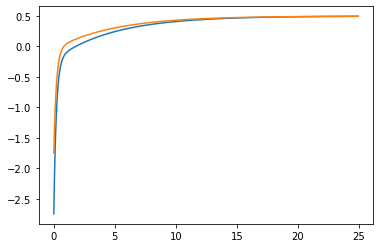

In [14]:
error = (y1 - x1[:, 0])
plt.plot(t1, error)
plt.plot(t1, y1)
error

In [15]:
dummy = np.array([1, 0])
B = np.vstack(dummy)

In [16]:
x1_minmax = np.array([x1.min(), x1.max()])

## Prototype custom cls 

Environment 1: Track undershoot 

In [ ]:

# Import dependencies
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint


class SISO_nmp(Env):
    """
    Class environment for custom NMP.
    State space representation:
    ẋ = Ax + Bu
    y = Cx + D
    """

    def __init__(self):
        """
        Initialize the system parameters
        """
        # State space parameters:
        self.A = np.array([[-5, -1], [1, 0]])
        self.B = np.array([1, 0])
        self.C = np.array([-2, 0.25])
        self.D = np.array([0])

        # State matrix:
        self.x = [0, 1]
        self.step_size = 0.05
        self.time = 25
        self.n = int(self.time / self.step_size)

        # Counter to count the no. of steps
        self.tstep = 0

        # Track no. of steps for undershoot (Cap at 20 steps)
        self.track = 0

        # Action space (either negative input, positive input or zero input)
        self.action_space = Box(low=np.float32(np.array([0])),
                                high=np.float32(np.array([1])))

        # State (the current value of u signal)
        self.state = np.array([random.uniform(-5, 5)])
        self.cpos = None

        # Observation space (the output y)
        self.observation_space = Box(low=np.float32(np.array([-10])),
                                     high=np.float(np.array([10])))

        # Set point
        self.setpoint = -3

        # Output matrix:
        self.output = [0]

        # Rewards:
        self.reward = None

    # Make the methods static:
    @staticmethod
    def process(x, t, A, B, u):
        """
        State space equation for solving: ẋ = Ax + Bu
        """
        dxdt = A@x + B*u
        return dxdt
    
    @staticmethod
    def get_val(u, x, C, D):
        """
        Calculate the output: y = Cx + D
        """
        y = C@x.T + D*u
        return y

    def step(self, action, done):
        """
        Predict the output.
        Rewards:
        For all steps (including termination): +1
        For undershoot: -5
        For opposite response: -5
        """
        # Assert the action is valid:
        error_msg = f"{action} is not a valid action."
        assert self.action_space.contains(action), error_msg

        # If action valid, get our control signal
        # Generate -ve or +ve input
        self.cpos = action*self.state

        # Get the state and output
        x_next = odeint(self.process, self.x, [self.tstep*self.step_size],
                        args=(self.A, self.B, self.cpos, ))
        y = self.get_val(self.cpos, self.x, self.C, self.D)
        self.output.append(y)

        # Model the problem:
        if(self.output[self.tstep] < self.setpoint):
            # Output goes below zero
            done = True
            reward = -5
        elif(self.output[self.tstep] < self.output[self.tstep - 1] and self.track == 30):
            # Opposite response
            done = True
            reward = -5
        elif(self.tstep == self.n):
            done = True
            reward = 1
        else:
            reward = 1

        return reward, done, x_next

    def render(self):
        """
        Render the environment
        """
        pass

    def reset(self):
        """
        Reset the environment back to defaults
        """
        # Reset the state
        self.state = np.array([random.uniform(-5, 5)])
        self.x = np.array([0, 1])

        self.tstep = 0
        self.track = 0

        self.output = [0]

        return self


In [ ]:
# Check if environment works:
env = SISO_nmp()
state_dim = env.observation_space.shape
action_dim = env.action_space.shape
action_bound = env.action_space.high[0]
print("State Dim: {0}\n Action Dim: {1}\n Action Bound: {2}"
      .format(state_dim, action_dim, action_bound))


State Dim: (1,)
 Action Dim: (1,)
 Action Bound: 1.0


In [ ]:
# Loop for one episode
score = 0
while not done:
    action = env.action_space.sample()
    reward, done, next = env.step(action, done)

    # Log the undershoot:
    if (env.output[env.tstep] < env.output[env.tstep - 1]):
        env.track += 1

    # Updates
    score += reward
    env.x = np.hstack(next)
    env.tstep += 1

    


In [ ]:
# Loop for 10 episodes:
scores = []
for i in range(10):
    done = False
    env = env.reset()
    score = 0

    while not done:
        action = env.action_space.sample()
        reward, done, next = env.step(action, done)

        # Log the undershoot:
        if (env.output[env.tstep] < env.output[env.tstep - 1]):
            env.track += 1

        # If not done:
        score += reward
        env.x = np.hstack(next)
        env.tstep += 1
        
    scores.append(score)


In [ ]:
scores

[501, 501, 501, 501, 501, 501, 501, 501, 501, 501]

## CLS 2

Modify system parameters

In [ ]:
# Import dependencies
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint


class SISO_nmp_modified(Env):
    """
    Class environment for custom NMP.
    State space representation:
    ẋ = Ax + Bu
    y = Cx + D
    """

    def __init__(self):
        """
        Initialize the system parameters
        """
        # State space parameters:
        self.A = np.array([[-5, -1], [1, 0]])
        self.B = np.array([1, 0])
        self.C = np.array([-2, 0.25])
        self.D = np.array([0])

        # State matrix:
        self.x = [0, 1]
        self.step_size = 0.05
        self.time = 25
        self.n = int(self.time / self.step_size)

        # Counter to count the no. of steps
        self.tstep = 0

        # Action space (either negative input, positive input or zero input)
        self.action_space = Box(low=np.float32(np.array([0])),
                                high=np.float32(np.array([1])))

        # State (the current value of u signal)
        self.state = np.array([random.uniform(-5, 5)])
        self.cpos = None

        # Observation space (the output y)
        self.observation_space = Box(low=np.float32(np.array([-10])),
                                     high=np.float(np.array([10])))

        # Set point
        self.setpoint = -3
        self.thres = -2

        # Output matrix:
        self.output = [0]

        # Rewards:
        self.reward = None

    # Make the methods static:
    @staticmethod
    def process(x, t, A, B, u):
        """
        State space equation for solving: ẋ = Ax + Bu
        """
        dxdt = A@x + B*u
        return dxdt

    @staticmethod
    def get_val(u, x, C, D):
        """
        Calculate the output: y = Cx + D
        """
        y = C@x.T + D*u
        return y

    def step(self, action, done):
        """
        Predict the output.
        Rewards:
        For all steps (including termination): +1
        For undershoot: -5
        For opposite response: -5
        """
        # Assert the action is valid:
        error_msg = f"{action} is not a valid action."
        assert self.action_space.contains(action), error_msg

        # If action valid, get our control signal
        # Generate -ve or +ve input
        self.cpos = action*self.state

        # Get the state and output
        x_next = odeint(self.process, self.x, [self.tstep*self.step_size],
                        args=(self.A, self.B, self.cpos, ))
        y = self.get_val(self.cpos, self.x, self.C, self.D)
        self.output.append(y)

        # Model the problem:
        if(self.output[self.tstep] < self.setpoint):
            # Output goes below zero
            done = True
            reward = -5
        elif(self.output[self.tstep] - self.output[self.tstep-1] < -self.thres):
            # Opposite response
            done = True
            reward = -5
        elif(self.tstep == self.n):
            done = True
            reward = 1
        else:
            reward = 1

        return reward, done, x_next

    def render(self):
        """
        Render the environment
        """
        pass

    def reset(self):
        """
        Reset the environment back to defaults
        """
        # Reset the state
        self.state = np.array([random.uniform(-5, 5)])
        self.x = np.array([0, 1])

        self.tstep = 0
        self.track = 0

        self.output = [0]

        return self


In [ ]:
env = SISO_nmp_modified()

In [ ]:
# Loop for 10 episodes:
scores = []
for i in range(10):
    done = False
    env = env.reset()
    score = 0

    while not done:
        action = env.action_space.sample()
        reward, done, next = env.step(action, done)

        # If not done:
        score += reward
        env.x = np.hstack(next)
        env.tstep += 1

    scores.append(score)


In [ ]:
import sys
sys.version

'3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]'